# Titanic Machine Learning - Classification

Logistic Regression using Titanic dataset to predict the classification Survival or Deseased for passengers who were on the titanic. Dataset is a semi clean dataset from udemy but origional source is from kaggle.com

In [128]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
# enlarge graphs and plots
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [130]:
# import the dataset
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [131]:
# print first 5 columns of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

<AxesSubplot:>

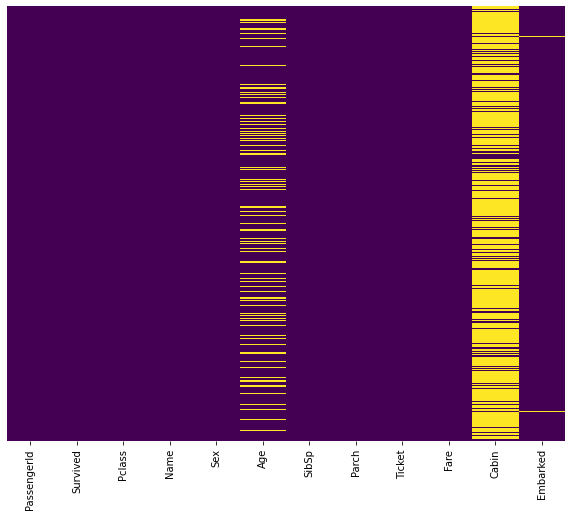

In [114]:
# Check for missing values
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False, cmap='viridis')

The dataset shows that there are 3 columns that have missing values. Column Embarked only a few missing values. The column AGE also has missing values and these values can be replaced by the mean, mode or median values of Age for the whole dataset. It can also be noted however that the column CABIN has much more missing values and therefore imputing values for this column will not improve our model and therefore the column will be discarded in building the model.

<AxesSubplot:xlabel='Survived', ylabel='count'>

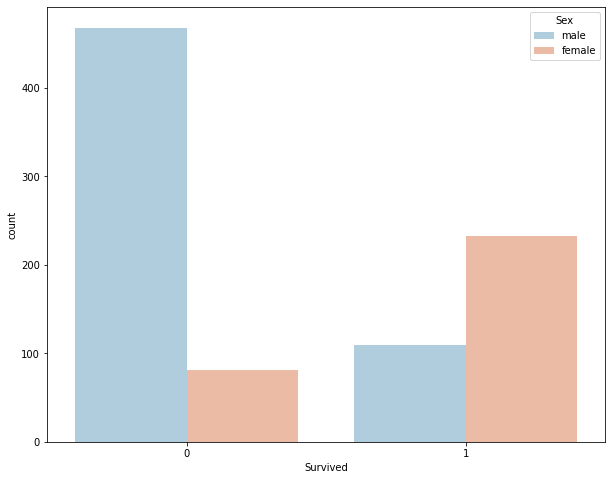

In [14]:
# Check the ratio of target variables
sns.countplot(x='Survived', hue='Sex', data= train, palette="RdBu_r")

The graph above shows that people that were likely to survive are females more than males. Most males did not survive than females

<AxesSubplot:xlabel='Survived', ylabel='count'>

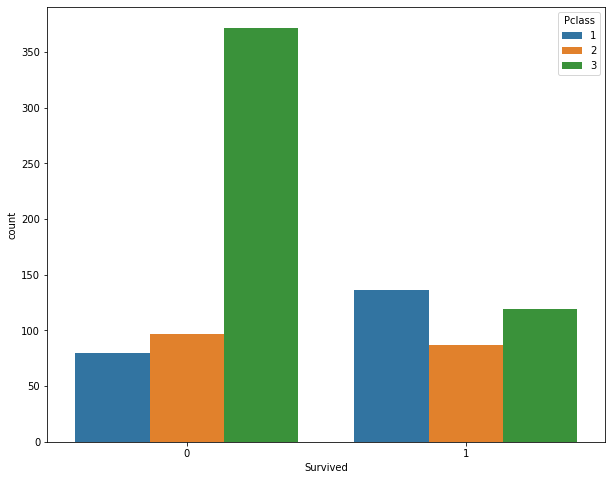

In [12]:
sns.countplot(x='Survived', hue='Pclass', data= train)

The graph above shows that mos people who survived were in the Passenger class 1 'Pclass' and most people who did not survive were in the Passanger class 3.

<AxesSubplot:xlabel='Age', ylabel='Count'>

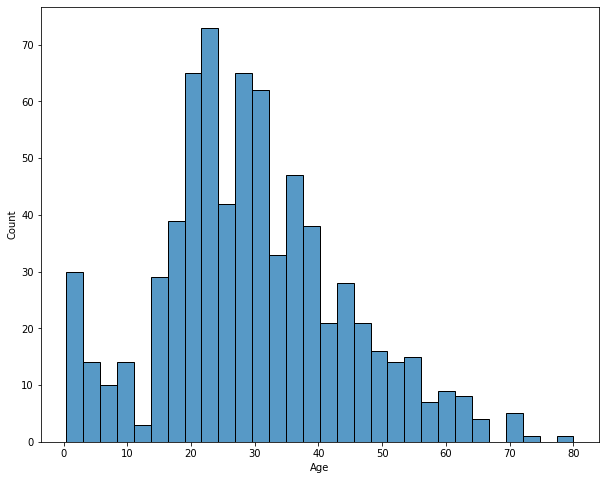

In [22]:
# age of people on titanic
sns.histplot(data = train, x='Age',kde=False,bins=30)

The graph shows the distribution of Age of on titanic. The histogram shows a right-skewed distribution of Age towards younger people between the age 20-30 years. People that ar older are less represented on the titanic.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

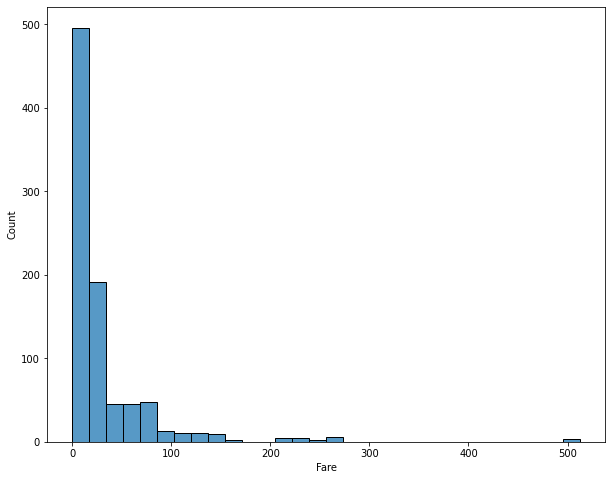

In [25]:
# fare price
sns.histplot(train['Fare'], bins=30)

The graph shows the distribution of Fare tickets. Most of the purchase prices for fares is between 0-50 as most passengers are in the cheaper 3rd class.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

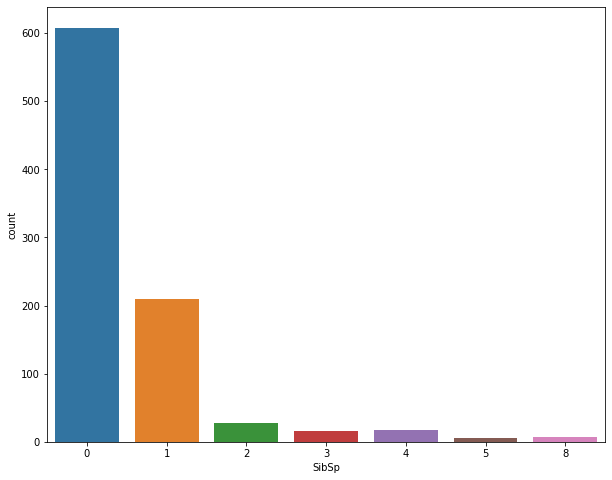

In [27]:
# people with siblings or spouses
sns.countplot(data=train, x='SibSp')

The graph show that most people on board did not have either a spouse or children on board. This is followed by people who only have either a spouse or a sibling on board.

# Data Preprocessing

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

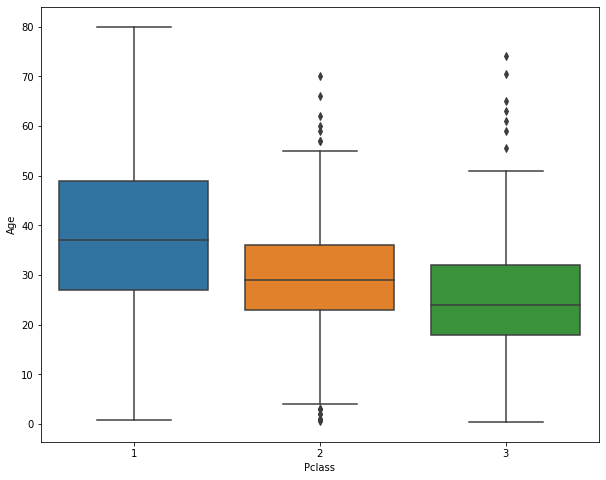

In [119]:
# dealing with missing values
sns.boxplot(x='Pclass', y='Age', data=train)

Imputation of Age will be done by Passenger class "Pclass". Using analysis of the box plot above, we note that the wealthier class of people tend to be older than people from the other Passanger classes (class 2 & 3) therefore imputation of Age will be based on Passenger class. 

In [132]:
# getting mean age of Pclass 1,2,3
print(f"Pclass 1 mean Age = {train[train['Pclass']==1].Age.mean()}")
print(f"Pclass 2 mean Age = {train[train['Pclass']==2].Age.mean()}")
print(f"Pclass 3 mean Age = {train[train['Pclass']==3].Age.mean()}")

Pclass 1 mean Age = 38.233440860215055
Pclass 2 mean Age = 29.87763005780347
Pclass 3 mean Age = 25.14061971830986


In [133]:
# create function to impute age values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
            

In [134]:
# impute train data
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

#impute test data
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [135]:
# drop the cabin column
train.drop('Cabin',axis=1, inplace=True)

# test data
test.drop('Cabin',axis=1, inplace=True)

In [136]:
# drop all other missing columns
train.dropna(inplace=True)

#test data
test.dropna(inplace=True)

## Converting categorical features into dummies

In [137]:
# 

In [138]:
# train data
sex = pd.get_dummies(train['Sex'], drop_first=True)

# test
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

In [139]:
# train data
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# test data
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [140]:
# add the dataframes using concat function
train = pd.concat([train, sex, embark], axis=1)

# test data
test = pd.concat([test, sex_test, embark_test], axis=1)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [142]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [143]:
# train data
train.drop(['PassengerId','Sex', 'Embarked','Name','Ticket'], axis=1, inplace=True)

# test data
test.drop(['PassengerId','Sex', 'Embarked','Name','Ticket'], axis=1, inplace=True)

In [144]:
# train final data
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [145]:
# test final data
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


<AxesSubplot:>

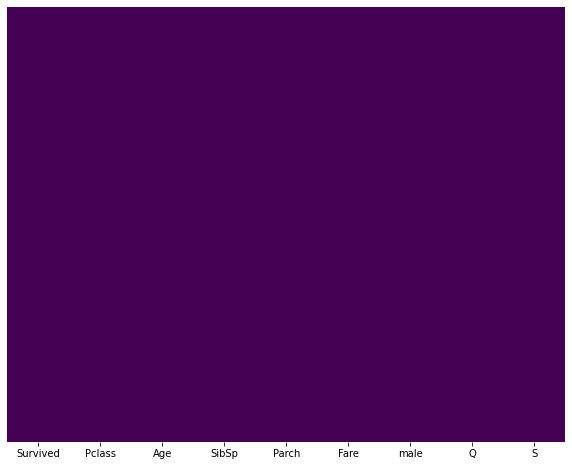

In [146]:
# check missing values
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False, cmap='viridis')

Dataset now has NO missing values

# Building the Models - Logistic Regression

In [147]:
# seperate data into X & y
X = train.drop('Survived', axis=1)
y = train['Survived']

In [148]:
# use sklearn to split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [149]:
# train data using logistic regression
from sklearn.linear_model import LogisticRegression

# create an instance of a model
Logmodel = LogisticRegression()

In [150]:
# fit the model
Logmodel.fit(X_train, y_train)


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
# get the predictions
predictions = Logmodel.predict(X_test)

# Classification Evaluation Metrics

In [106]:
# import libraries
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



Precision score of the model is 0.83. It meausres the quality of a positive predictions (Specificity) made by the model. Precision is used when the cost of False positive is High i.e Cost of type 1 error is high

Recall score of the model is 0.83. It meausures the proportion of Actual Positive labels correctly identified in the model. Recall is used when False Negatives are important i.e Type 2 error.

F1 is the harmonic mean of Precision and Recall. It is a statistical measure of the accuracy of a model and ranges between 0-1. The higher the F1 score the bteer the model in predicting the independent variable.

In [108]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [109]:
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 31  73]]


## Predictions on test data

In [153]:
results = Logmodel.predict(test)

In [154]:
results

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,